# Working with data 2017. Class 8
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 0. Structure
1. Stats
    - Definitions
    - What's a p-value?
2. Intro to regressions

In [2]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
from scipy.stats import chi2_contingency,ttest_ind

#Library for linear regression
import statsmodels.formula.api as smf

#This allows us to use R
%load_ext rpy2.ipython

#Visualize in line
%matplotlib inline

#Be able to plot images saved in the hard drive
from IPython.display import Image,display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# 1 Statistics I
To learn about statistics *well*, I recommend this course: https://www.coursera.org/specializations/social-science



## 1.1 Definitions
### 1.1.1 Population vs sample
- Population: The entire set of possible observations (all people in a country in a country-level survey)
- Sample: The observations we actually have

    
### 1.1.2 Parameter vs statistic
- Parameter: The true values that define the population ($\sigma$ and $\mu$ for a normal distribution)
- Statistic: The values that we calculate using our sample (STD and MEAN for a normal distribution)
    
    
### 1.1.3 Probability
- Probability: The proportion of times where the measured event occurs in the long run. 
- For instance, the probability of a coin toss is 0.5, which means that if you toss a coin 1 million times you will more or less get 500k heads and 500k tails)


### 1.1.4 Null hypothesis:
- The hypothesis that our value is not significant.
- For instance our value can be the difference between two groups, or the difference between one group and zero.
- It is assumed to be true and we try to disprove it.
- It is "disproved" if the chances to dismiss it by chance are lower than 5%.


### 1.1.5 Alternative hypothesis:
- The hypothesis that our value is significant.
- Accepted after dismissing the null hypothesis.
    
    
### 1.1.6 Types of error:
- Type I ($\alpha$): False positive. Rejecting the null hypothesis when it was actually True (saying we have something we don't have). As a rule we set it to 0.05 and if the p-value is below it we accept the alternative hypothesis.
- Type II ($\beta$): False negative. Accepting the null hypothesis when it was actually False (saying we don't have something we actually have). This is a less important error.
    
    
### 1.1.7 p-value
- The p-value is defined as the probability of obtaining a result equal to or "more extreme" than what was actually observed, **when the null hypothesis is true.**
- "commonly misused and misinterpreted." --> a p-value of 0.01 does not mean that there is 1% chances that you are wrong!
- Low p-value can be for two reasons:
    - The null is true but your sample was unusual.
    - The null is false.
- with a p-value of 0.05 the probability of incorrectly rejecting a true null hypothesis is 23% (mainly for other bias).

### 1.1.8 Confidence intervals
- The likely range of values where the value of a parameter lies within. 
- It depends on your significance level (usually 0.05)
    
### 1.1.9 Effect size:
- Size of the difference between two groups (or one group with zero) divided by the standard deviation. 
- Show the confidence intervals.
- Good summary: https://www.leeds.ac.uk/educol/documents/00002182.htm
- "For example, an AIDS vaccine study in Thailand obtained a P value of 0.039. Great! This was the first time that an AIDS vaccine had positive results. However, the confidence interval for effectiveness ranged from 1% to 52%. That’s not so impressive...the vaccine may work virtually none of the time up to half the time. The effectiveness is both low and imprecisely estimated." quote: http://blog.minitab.com/blog/adventures-in-statistics-2/five-guidelines-for-using-p-values
    
    

### 1.1.10 Correlation
- Dependence or association is any statistical relationship, whether causal or not, between two random variables or two sets of data. Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other.

### 1.1.11 In general:
- Larger population: We can detect smaller differences.
- Smaller variability within groups: We can detect smaller differences.
- Large differences between groups (effect size): Unlikely that it is due to noise.



## 1.2 Biases 
### 1.2.1 Cherry-picking (yourself)
- Using individual cases or data that seem to confirm a particular position, while ignoring a significant portion of related cases or data that may contradict that position.
- Cherry picking may be committed intentionally or unintentionally. 

### 1.2.2 Look-elsewhere effect (sample size)
- If you try many things, one will be significant.
- **With a sample size large enough, any outrageous thing is likely to happen** (Persi Diaconis and Frederick Mosteller) 
- If you have a database, scan the values to see if there is something interesting, and then use those values --> you are cheating. Your minimum p-value shouldn't be 0.05, should be 0.05/(variables scanned beforehand)

### 1.2.3 Optional stopping (data collection)
- It is a well-known fact of null-hypothesis significance testing (NHST) that when there is "optional stopping" of data collection with testing at every new datum (a procedure also called "sequential testing" or "data peeking"), then the null hypothesis will eventually be rejected even when it is true. With enough random sampling from the null hypothesis, eventually there will be some accidental coincidence of outlying values so that p < .05 (conditionalizing on the current sample size). Anscombe (1954) called this phenomenon, "sampling to reach a foregone conclusion." from; http://doingbayesiandataanalysis.blogspot.nl/2013/11/optional-stopping-in-data-collection-p.html

In [13]:
print("look-elsewhere effect")
Image(url="http://www.tylervigen.com/chart-pngs/13.png",width=1000)

look-elsewhere effect


### More on the look-elsewhere effect
- If you try too many things, one of them is going to be significant.
- You need adjustments (more on that another time)
- We are creating a completely random dataset with 100 observations and 50 variables
- We are trying to see if we can fit a linear model

In [3]:
random_data = pd.read_csv("data/random_data.csv")
random_data.head()

,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,0.609577,0.241446,0.043487,0.090171,0.070310,0.357984,0.513340,0.730515,0.652123,0.444212,...,0.963232,0.081885,0.609779,0.421406,0.787328,0.224110,0.623656,0.264583,0.047219,0.635203
1,0.999337,0.508955,0.852469,0.926850,0.538302,0.467758,0.492248,0.176763,0.283277,0.119780,...,0.989186,0.303781,0.569563,0.911153,0.263576,0.338325,0.116425,0.208483,0.896658,0.390472
2,0.848455,0.240611,0.286146,0.626276,0.586698,0.065730,0.704501,0.130662,0.191089,0.549399,...,0.378081,0.683264,0.135727,0.119104,0.496350,0.358919,0.658667,0.109359,0.811015,0.030633
3,0.200003,0.224744,0.507616,0.952387,0.636957,0.209662,0.856251,0.013872,0.336290,0.746147,...,0.224444,0.349005,0.079478,0.090397,0.274313,0.316322,0.408448,0.525078,0.330676,0.126918
4,0.532524,0.780766,0.185013,0.478061,0.563605,0.386908,0.984059,0.822000,0.829871,0.759415,...,0.386905,0.008826,0.213562,0.082797,0.635893,0.298970,0.155664,0.870900,0.764220,0.925988


In [4]:
#Fit a regression
import statsmodels.formula.api as smf

cols_x = ["x{}".format(i) for i in range(50)]
mod = smf.ols(formula='y ~ {}'.format("+".join(cols_x)), data=random_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                 -0.154
Method:                 Least Squares   F-statistic:                    0.7355
Date:                Thu, 25 Jan 2018   Prob (F-statistic):              0.859
Time:                        09:37:55   Log-Likelihood:                 11.800
No. Observations:                 100   AIC:                             78.40
Df Residuals:                      49   BIC:                             211.3
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0740      0.475      0.156      0.8

## 1.3 Don't do bad science
**We're in a replication crisis.**
- ALWAYS give all the information needed to replicate your results (including all the parameters of your models and your data unless restricted by licenses).
- Be aware of the biases and try to correct for them.
- Use **Bonferroni correction**: if you try 10 things, your p-value should be lower than 0.05/10 to be significant

**Number of failed replications**: `of another author (your own papers)`

`

    chemistry: 90% (60%),
    biology: 80% (60%),
    physics and engineering: 70% (50%),
    medicine: 70% (60%),
    Earth and environment science: 60% (40%).
    
`    

http://www.nature.com/news/1-500-scientists-lift-the-lid-on-reproducibility-1.19970?WT.mc_id=SFB_NNEWS_1508_RHBox



In [16]:
Image(url="http://cdn.app.compendium.com/uploads/user/458939f4-fe08-4dbc-b271-efca0f5a2682/742d7708-efd3-492c-abff-6044d78e3bbd/Image/01bec95ec63634b9062de57edde1ecf7/replicationbypvalue.png")

# 4. Fitting distributions
## Why do we care about distributions?
- They tell us a lot about the mechanism generating our values

## 4.1 (Some) Continuous distributions
### 4.1.1 Normal distribution: 
    - Nothing weird going on (just normal)
### 4.1.2 Lognormal distribution: 
    - Multiplicative process: 
        - The value depends on the multiplication of many variables.
        - For example, each unit of time you can grow depending on some random factors (revenue of company, publication of a paper...)
    - Many financial indicators are lognormally distributed
    - Looks like a normal distribution if you take the logarithm of your values (np.log(x))
### 4.1.3 Exponential distribution: 
    - Time between events (generated by poisson events)
    - If the time between events follows an exponential distribution the events are independent
    - It's a straight line if the y axis is in log scale
    - Mean == STD
    
### 4.1.4 Power-law distribution: 
    - Rich-get-richer mechanism: Your growth depends on your value -> Inequality is unavoidable
    - The **tails** of some human and financial phenomena follow power-laws.
    - The tail is a straight line in log-log scale (both y and x axis)
    - Beware with this one, people see them everywhere, but they are rare: https://arxiv.org/abs/1801.03400

## 4.2 (Some) Discrete distributions
### 4.2.1 Poisson distribution: 
    - Number of successes in some time. Each event independent
    - Used for counts (number of attacks in a year)
    - Mean == Variance (there are tests for this)
    
### 4.2.1 Zero-inflated poisson distribution: 
    - Two processes: probability to have > 0 events, and then a normal Poisson for the number of successes in some time. Each event independent
    - Used for counts when there are more zeros than in a Poission. For instance: the number of guitar lesson takens in a population. Most people take zero, among the people who take some, each guitar lesson is independent.
    - Mean == Variance (there are tests for this)


### 4.2.2 Binomial distribution: 
    - Number of successes out of a number of trials. Each event independent

### 4.2.3 Negative binomial distribution: 
    - Number of successes before a number of failures occurs. Each event independent
    - In regressions: Used as an alternative of poisson distribution, when Variance >> Mean





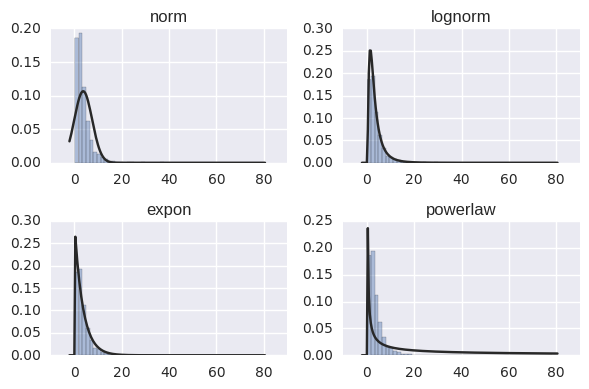

In [17]:
from scipy.stats import lognorm,norm,expon,powerlaw
x = np.random.lognormal(1,0.8,3000) 
plt.subplot(2,2,1)
sns.distplot(x,fit=norm,kde=False)
plt.title("norm")

plt.subplot(2,2,2)
sns.distplot(x,fit=lognorm,kde=False)
plt.title("lognorm")

plt.subplot(2,2,3)
sns.distplot(x,fit=expon,kde=False)
plt.title("expon")

plt.subplot(2,2,4)
sns.distplot(x,fit=powerlaw,kde=False)
plt.title("powerlaw")

plt.tight_layout()
plt.show()

### Check if a distribution is more or less normally distributed

In [5]:
def qq_plot(x):
    import scipy.stats
    (osm, osr),(slope, intercept, r)  = scipy.stats.probplot(x, dist='norm', plot=None)
    plt.plot(osm, osr, '.', osm, slope*osm + intercept)
    plt.xlabel('Quantiles',fontsize=14)
    plt.ylabel('Quantiles Obs',fontsize=14)  

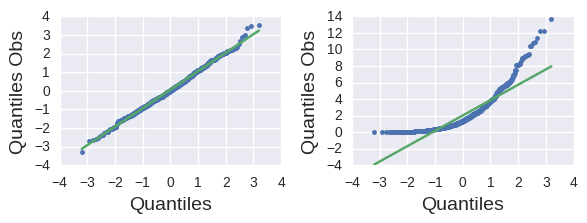

In [7]:
x = np.random.randn(1000)
plt.subplot(2,2,1)
qq_plot(x)

x = np.random.exponential(2,1000)
plt.subplot(2,2,2)
qq_plot(x)


plt.tight_layout()
plt.show()

# 5. Calculate Confidence Intervals with bootstrap methods
- How does it work?
- You have a sample (imagine 100 values)
- Do 10000 times: 
    - Take 100 values from the sample (with replacement)
    - Calculate the mean (or std)
- Take the percentiles 2.5 and 97.5 of those 10000 values -> Those are your confidence intervals (kind-of)


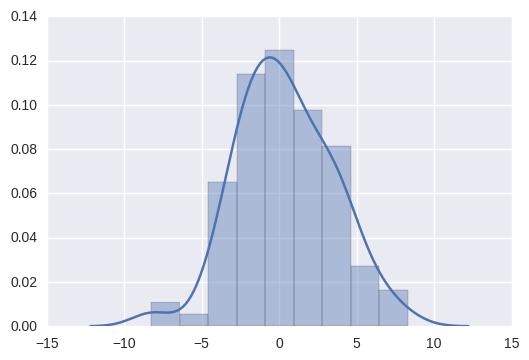

In [10]:
sns.distplot(x)

In [11]:
import scikits.bootstrap as bootstrap

#Random sample with mean 0 and std 3
x = np.random.randn(100)*3 #this could be one of our columns
print(np.mean(x),np.std(x))

CIs = bootstrap.ci(x, statfunction=np.mean,n_samples=100000)  
print('CI for mean with bootstrapping = ', CIs)

CIs = bootstrap.ci(x, statfunction=np.std,n_samples=100000)  
print('CI for std with bootstrapping = ', CIs)


0.258857686491 2.7088906142
CI for mean with bootstrapping =  [-0.27564358  0.78312406]
CI for std with bootstrapping =  [ 2.41372029  3.15338464]


# 6. Introduction to regressions

## 6.0 Assumptions (we'll see one by one next day):
- Linearity and additive terms.
- No autocorrealtion in residuals:
- Homoskedasticity (the residuals must have constant variances).
- Normality in the residuals:
- No multicollinearity (no high correlation in the independent variables):
- No outliers

## 6.1 Type of dependent variable
- Continuous: 
    - **Linear regression**: OLS. y ~ B1*x1 + B2*x2...
    - Lasso/Ridge regression: To deal with multi-colinearity
    
- Categorical:
    - **Binary logistic regression**: 2 categories (Woman/Man, Fail/Pass...)
    - Ordered logistic regression: >2 ordered categories (Low/Middle/High)
    - Nominal logistic regression: >2 nominal categories (Blue/Red/Yellow)
    
- Count of events:
    - Poisson regression: Count of events in a time. Mean == Var
    - Negative binomial regression: If var >> mean
    - Zero inflated regression: If too many zeros 

## 6.2 Hierarchical models / Mixed  models / Multilevel models
- A normal model (with 1 or more independent variables) is a fixed effects model
    - Random effects are:
    - Factors likely to introduce systematic variation
    - Different experimental units (groups) have different intercepts of slopes.
    
- You can control for in what is called a random effects model.
    - **Random intercept model**: For instance, we want to measure the relationship between unemployment and productivity for different regions in many countries. Each country may have their own "structural" unemployment, we can get rid of this variability by using country as the random effects. --> (1|country)

In [21]:
Image(url="http://zoonek2.free.fr/UNIX/48_R/g1096.png")

## 6.2 Hierarchical models / Mixed  models / Multilevel models
- A normal model (with 1 or more independent variables) is a fixed effects model
    - Random effects are:
    - Factors likely to introduce systematic variation
    - Different experimental units (groups) have different intercepts of slopes.
    
- You can control for in what is called a random effects model.
    - **Random intercept model**: For instance, we want to measure the relationship between unemployment and productivity for different regions in many countries. Each country may have their own "structural" unemployment, we can get rid of this variability by using country as the random effects. --> (1|country)
    - **Random intercept and slopes model**: Another example, we measure the relationship between two variables at different years in different countries. We don't really care about how they change in time, we only care about how one variable affect the other. We can use time as the random effect. --> (year|country)

In [22]:
#https://hlplab.wordpress.com/tag/regression/
Image(url="https://hlplab.files.wordpress.com/2011/05/simpsons-paradox.png",width=800)  

## 6.2 Hierarchical models / Mixed  models / Multilevel models
- A normal model (with 1 or more independent variables) is a fixed effects model
    - Random effects are:
    - Factors likely to introduce systematic variation
    - Different experimental units (groups) have different intercepts of slopes.
    
- You can control for in what is called a random effects model.
    - **Random intercept model**: For instance, we want to measure the relationship between unemployment and productivity for different regions in many countries. Each country may have their own "structural" unemployment, we can get rid of this variability by using country as the random effects. --> (1|country)


    - **Random intercept and slopes model**: Another example, we measure the relationship between two variables at different years in different countries. We don't really care about how they change in time, we only care about how one variable affect the other. We can use time as the random effect. --> (year|country)
        
    - You can have multiple random effects. In that case the random effects can be:
        - Nested: E.g. region within country --> (1|country/region)
        - Crossed: E.g. sector & country --> (1|sector) + (1|country)

    - The design can be balanced (same number of observation per group) or unbalanced (different number). Unbalanced designs require special techniques, usually handled by the package.

_Here paradox_        



## 6.3 Longitudinal vs cross-sectional
- Having time information is great:
    - Allow us to test for Granger causality (x happens before y, thus x could be a cause of y)
    - Allow us to increase the number of observations
- Having time information is terrible:
    - The observations are not independent anymore, we need to use hierarchical models.
        - Pooled OLS (not a hierarchical model, usually not appropriate)
        - **Between model** (also called random effects model)
            - Looks at the effects of changes of x in y in time within and between individuals at the same time.
            - If you have an omitted variables (and it is correlated with one of your independent variables) you'll have a problem.
            - If you don't have an omitted variable then it's great.
        - **Within model** (also called fixed effects model)
            - Looks at the effects of changes of x in y in time only within individuals.
            - The fixed effects are the subject-specific means.
            - If the subjects don't change much in time you have a problem.
            - You cannot include time-invariant values (such as gender).
        - Mundlack. 
            - Looks at the effects of changes of x in y in time within and between individuals differenciating between the two.
            - It's always great.
    - If your aim is to predict or to look at complex time relationships that you cannot control for then you need to use other type of models such as AR, I, MA (or a combination).
    
Note: Panel means you have repeated measurements for each individual (or whatever your unit of analysis is).

## 6.4 Other tests
- Count vs expected: **Binomial test**
- Independence of two categorical variables: **Chi square test**
- Comparing the means of two or more groups: **t-test,MKK...**

## 6.5 Examples of how to run regressions
- The difficult part is how to know if you can run them.

In [14]:
## READ DATA
#Read data
df = pd.read_csv("data/big3_position.csv",sep="\t")
#Kepe only two types of entities
df = df.loc[df["TypeEnt"].isin(["Industrial company","Bank"])]
#Transform the variables to log
df["logMarketCap"] = np.log10(df["MarketCap"])
df["logRevenue"] = np.log10(df["Revenue"])
df["logEmployees"] = np.log10(df["Employees"])
#Delete nan
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["logMarketCap","logRevenue","logEmployees"])
#keep only the columns that we are going to use
df = df.loc[:,["logMarketCap","logRevenue","logEmployees","TypeEnt"]]

df.head()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10


,logMarketCap,logRevenue,logEmployees,TypeEnt
0,7.118034,6.875061,3.875061,Bank
1,7.223738,6.875061,3.875061,Industrial company
2,4.637410,5.544068,3.176091,Industrial company
3,4.426088,5.544068,2.875061,Industrial company
23,5.483054,3.634679,1.633468,Industrial company


### 6.5.1 Standard regression (OLS)

In [15]:
#Now our cond. number is okay
mod1 = smf.ols(formula='logMarketCap ~ logRevenue + logEmployees', data=df)
res_ols = mod1.fit()
print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           logMarketCap   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2225.
Date:                Tue, 30 Jan 2018   Prob (F-statistic):               0.00
Time:                        09:44:57   Log-Likelihood:                -2413.1
No. Observations:                2880   AIC:                             4832.
Df Residuals:                    2877   BIC:                             4850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3700      0.066     35.825   

### 6.5.2 Standard regression (OLS) with interaction effects

In [16]:
#Now our cond. number is okay
mod2 = smf.ols(formula='logMarketCap ~ logRevenue*logEmployees', data=df)
res_ols_int = mod2.fit()
print(res_ols_int.summary())

                            OLS Regression Results                            
Dep. Variable:           logMarketCap   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1715.
Date:                Tue, 30 Jan 2018   Prob (F-statistic):               0.00
Time:                        09:44:57   Log-Likelihood:                -2282.6
No. Observations:                2880   AIC:                             4573.
Df Residuals:                    2876   BIC:                             4597.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

(3, 9)

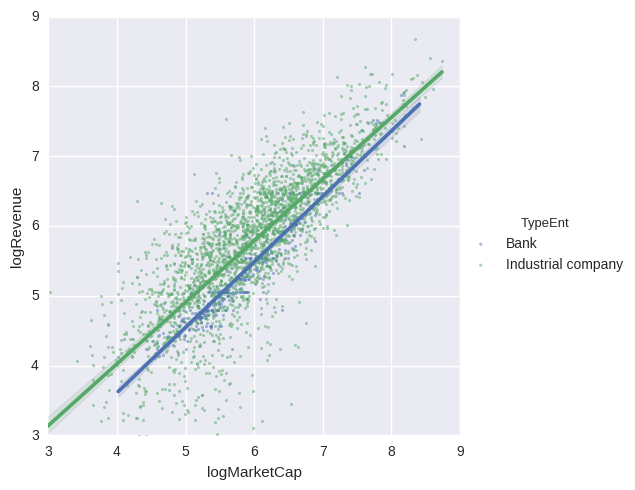

In [17]:

sns.lmplot(x= "logMarketCap",y="logRevenue",data=df,fit_reg=True,hue="TypeEnt",scatter_kws={"alpha":0.5,"s":5},truncate=True)
plt.xlim(3,9)
plt.ylim(3,9)

### 6.5.3 Standard regression (OLS) with categorical data as a fixed effect

In [18]:
#Now our cond. number is okay
mod3 = smf.ols(formula='logMarketCap ~ logRevenue  + C(TypeEnt)', data=df)
res_ols_cat = mod3.fit()
print(res_ols_cat.summary())

                            OLS Regression Results                            
Dep. Variable:           logMarketCap   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2177.
Date:                Tue, 30 Jan 2018   Prob (F-statistic):               0.00
Time:                        09:44:58   Log-Likelihood:                -2432.2
No. Observations:                2880   AIC:                             4870.
Df Residuals:                    2877   BIC:                             4888.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### 6.5.4 Random effects model with categorical data as a random effect

In [19]:
#Random intercepts for different type of entities. We can also give random slopes
mod4 = smf.mixedlm(formula='logMarketCap ~ logRevenue',groups="TypeEnt", data=df)
res_mixed = mod4.fit()
print(res_mixed.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: logMarketCap
No. Observations: 2880    Method:             REML        
No. Groups:       2       Scale:              0.3173      
Min. group size:  375     Likelihood:         -2441.7007  
Max. group size:  2505    Converged:          Yes         
Mean group size:  1440.0                                  
-----------------------------------------------------------
             Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept    2.135     0.102  21.015  0.000   1.936   2.334
logRevenue   0.677     0.010  65.844  0.000   0.657   0.697
groups RE    0.014     0.036                               



In [20]:
pd.DataFrame(res_mixed.random_effects)

,Bank,Industrial company
groups,0.081349,-0.081349


## 6.5.5 Combine several regression summaries 

In [21]:
from statsmodels.iolib.summary2 import summary_col
dfoutput = summary_col([res_ols,res_ols_int,res_ols_cat],stars=True)
x = dfoutput.tables[0]

#x["logMarketCap IV"] = ["","","1.580***","(0.134)","","","0.028","(0.011)","",""]
x

,logMarketCap I,logMarketCap II,logMarketCap III
C(TypeEnt)[T.Industrial company],,,-0.1686***
,,,(0.0315)
Intercept,2.3700***,4.5074***,2.2197***
,(0.0662),(0.1440),(0.0620)
logEmployees,0.2028***,-0.7058***,
,(0.0247),(0.0598),
logRevenue,0.5107***,0.1687***,0.6775***
,(0.0219),(0.0294),(0.0103)
logRevenue:logEmployees,,0.1427***,
,,(0.0086),


In [ ]:
x.to_csv("table.csv",sep="\t") #or to_excel or to_latex

## 6.5.6 You can also use R

In [34]:
import rpy2
%load_ext rpy2.ipython
%R require("lme4")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: lme4

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

In [38]:
%%R -i df 

#Random effects
regression <- lmer(logMarketCap ~ logRevenue + (1|TypeEnt),data=df)

print(summary(regression))
print("========================================================")
print(coef(regression))


Linear mixed model fit by REML ['lmerMod']
Formula: logMarketCap ~ logRevenue + (1 | TypeEnt)
   Data: df

REML criterion at convergence: 4883.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.2171 -0.6112  0.0143  0.5906  5.9342 

Random effects:
 Groups   Name        Variance Std.Dev.
 TypeEnt  (Intercept) 0.01372  0.1171  
 Residual             0.31734  0.5633  
Number of obs: 2880, groups:  TypeEnt, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)  2.13470    0.10164   21.00
logRevenue   0.67720    0.01028   65.88

Correlation of Fixed Effects:
           (Intr)
logRevenue -0.560
[1] "========================================================"
$TypeEnt
                   (Intercept) logRevenue
Bank                  2.216057  0.6771977
Industrial company    2.053348  0.6771977

attr(,"class")
[1] "coef.mer"


### 6.5.7 Other types of models
- Univariate **Linear** Regression 
        mod = smf.ols(formula='log_MarketCap ~ log_Employees', data=df)
- Multivariate **Linear** Regression 
        mod = smf.ols(formula='log_MarketCap ~ log_Employees + log_Revenue', data=df)
- Multivariate **Linear** Regression with interactions
        mod = smf.ols(formula='log_MarketCap ~ log_Employees * log_Revenue', data=df)
- Multivariate **Linear** Regression with categorical data
        mod = smf.ols(formula='log_MarketCap ~ log_Employees + C(Position)', data=df)
- Multivariate **Logistic** Regression with categorical data --> In this case, the dependent variable MUST be categorical (0 or 1))
        mod = smf.logit(formula='xx ~ log_Employees + C(Position)', data=df)
- Mixed effect (**multilevel**) model with random intercepts --> In this case, there must be some groups (for instance countries)
        mod = smf.mixedlm(formula='log_MarketCap ~ log_Employees', data=df,groups="Position")
- Mixed effect (**multilevel**) model with random intercepts and random slopes
        mod = smf.mixedlm(formula='log_MarketCap ~ log_Employees', data=df,groups="Position", re_formula="Year")

In [ ]:
df.loc[:,["v1","v2","v3"]] = df.loc[:,["v1","v2","v3"]].astype(str)

## 6.6 (cross)-validation (advanced).
- A more robust approach when you have enough data.
- Uses a model with penalization on the number of parameters (such as Lasso or Ridge). The penalization is determined by a parameter (alpha).
- Divides de data into a training and testing set. Runs the regression in the training set using different values of alpha, and see how goods are the results by looking at the mean error (such as R^2) in the testing set.
- Typically seen as machine learning.

## 6.7 Bootstrapping in regressions (advanced).
for i in range(1000):
    - Take a random sample (same size, with replacement)
    - Run a regression
    - Save the coefficients
    
Calculate the confidence intervals based on the simulations. It is always robust.

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod3 = smf.ols(formula='logMarketCap ~ logRevenue*logEmployees + C(TypeEnt)', data=df)
res_ols_cat = mod3.fit()



table = sm.stats.anova_lm(res_ols_cat,typ=2) 
table

,sum_sq,df,F,PR(>F)
C(TypeEnt),17.593906,1.0,62.815248,3.218298e-15
logRevenue,173.587375,1.0,619.756308,4.759944e-124
logEmployees,21.842505,1.0,77.983957,1.769737e-18
logRevenue:logEmployees,85.873815,1.0,306.593948,2.626013e-65
Residual,805.257964,2875.0,NaN,NaN


## 6.8 How to know which model to run?
- You can always complicate the model more adding random effects and variables.
- Run the simplest model that makes sense. 
    - Do not add extra controls just because you have them, without any theory.
    - Do not remove complexity that may have an effect.
- You can compare between models wi 
   